# METODE SPIRAL

## model spiral

input yang diberikan:<br>
<br>
m = jumlah search point<br>
θ = sudut rotasi<br>
r = besar kontraksi<br>
k = maksimum nilai iterasi <br>

\begin{align}
m \;&(\geq2)\\
\theta \;&(0 < theta \leq 2\pi)\\
r \;&(0 < r < 1)
\end{align}

proses:<br>

1. secara random menyebar nilai inisial awal x sejumlah m titik <br>

2. tentukan k = 0 sebagai tahap awal<br>

3. cari setiap nilai f(x) dari nilai inisial awal diatas<br>

4. untuk optimasi -> tentukan nilai f(x) terendah/tertinggi dan jadikan x tersebut menjadi pusat spiral<br>

   untuk mencari akar -> masukkan 2 fungsi atau lebih (jumlah dari fungsi yang ada) ke persamaan F(x) dibawah lalu jadikan nilai x dengan F(x) nilai tertinggi sebagai pusat spiral<br><br>
   
\begin{align}
F(x) = \frac{{1}}{1+\sum_{k=1}^n |f_k(x)|}
\end{align}<br><br>

5. update nilai x dengan persamaan:<br><br>

\begin{align}
\begin{pmatrix}x_1^{n+1}\\ x_2^{n+1}\end{pmatrix} =
\begin{pmatrix} r & 0\\ 0 & r \end{pmatrix}
\begin{pmatrix} cos(\theta) & -sin(\theta)\\ sin(\theta) & cos(\theta) \end{pmatrix}
\begin{pmatrix} x_1^{n}-x^{n}_{1c}\\ x_2^{n}-x^{n}_{2c}\end{pmatrix}+
\begin{pmatrix} x^{n}_{1c}\\ x^{n}_{2c}\end{pmatrix} 
\end{align}<br>

dengan xc adalah nilai x yang menjadi pusat pada iterasi ke-n<br>

untuk kasus ini hanya menggunakan 2 variable sehingga fungsi rotasi dikhususkan untuk 2 variable, untuk lebih dari 2 variable digunakan persamaan <br>

misal terdapat matrix R dengan nxn dengan nilai<br>

\begin{align}
r_{ii}&=r_{jj}=cos(\theta)\\
r_{ij}&=-sin(\theta)\\
r_{ji}&=sin(\theta)\\
r_{st}&= \delta_{st}\;(\;dimana\; \delta_{st}=1\;jika\;s=t\;dan\;\delta_{st}=0\;jika\;s\neq t)
\end{align}<br>

6. ulangi hingga iterasi ke-k langkah ke 3 hingga ke 5 dengan mengganti nilai inisial awal menjadi nilai update pada langkah ke-5

## Library python

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import optunity
import numpy as np
import random
import math

## fungsi yang digunakan

fungsi yang digunakan untuk melakukan optimasi pada fungsi fxr1<br>

sedangkan untuk melakukan proses mencari akar kedua fungsi fx1 dan fx2 digunakan<br>

untuk mengganti fungsi hilangkan tanda command (#) dan memberi tanda command pada fungsi yang tidak digunakan

In [57]:
def fxr1(x,y): #(2-D Rastrigin function)
#     return(((x**4-16*x**2+5*x)/2)+((y**4-16*y**2+5*y)/2))
    return((x**2-10*np.cos(2*np.pi*x)+10)+(y**2-10*np.cos(2*np.pi*y)+10))

In [58]:
def fx1(x,y):
#     return(x*y-1)
#     return(x**2+y**2-4)
    return (np.exp(x-y)-np.sin(x+y))
#     return((x**2*y**2)-np.cos(x+y))
#     return(((x**2+y**2)/50)-np.cos(x)*np.cos(y)+1)
#     return(0.5*np.sin(x*y)-(0.25*y/np.pi)-(0.5*x))
#     return((1-(0.25/np.pi))*(np.exp(2*x)-math.e)+(math.e*y/np.pi)-(2*math.e*x))
#     return(0.2 + x**2 + y**2 - 0.1*np.cos(6.0*3.1415*x) - 0.1*np.cos(6.0*3.1415*y))
#     return((x**2)*(y**2)-np.cos(x+y))

In [59]:
def fx2 (x,y):
#     return(x*y-1)
#     return(x**2+y**2-4)
#     return (np.exp(x-y)-np.sin(x+y))
    return((x**2*y**2)-np.cos(x+y))
#     return(((x**2+y**2)/50)-np.cos(x)*np.cos(y)+1)
#     return(0.5*np.sin(x*y)-(0.25*y/np.pi)-(0.5*x))
#     return((1-(0.25/np.pi))*(np.exp(2*x)-math.e)+(math.e*y/np.pi)-(2*math.e*x))
#     return(0.2 + x**2 + y**2 - 0.1*np.cos(6.0*3.1415*x) - 0.1*np.cos(6.0*3.1415*y))
#     return((x**2)*(y**2)-np.cos(x+y))

### optimasi maksimum dan minimum

fungsi yang digunakan untuk mencari nilai minimum atau maksimum dari fungsi diatas dengan nilai x tertentu<br>

fxmax = untuk mencari nilai maksimum<br>

fxmin = untuk mencari nilai minimum

In [60]:
def fxmax(fx,x,y):
    func = fx(x[:],y[:])
    index_max = max(range(len(func)), key=func.__getitem__)
    return(index_max)

In [61]:
def fxmin(fx,x,y):
    func = fx(x[:],y[:])
    index_min = min(range(len(func)), key=func.__getitem__)
    return(index_min)

### mencari akar-akar

fungsi root untuk mencari nilai maksimum dari fungsi<br>

\begin{align}
F(x) = \frac{{1}}{1+\sum_{k=1}^n |f_k(x)|}
\end{align}<br>

untuk kasus ini hanya digunakan 2 fungsi

In [62]:
def root(fx1,fx2,x,y):
    func = 1/(1+(abs(fx1(x,y))+abs(fx2(x,y))))
    index_max = max(range(len(func)), key=func.__getitem__)
    return(index_max)

## spiral method

fungsi utama dari metode spiral<br>

fungsi ini hanya untuk 2 variable (karena terdapat matriks bernama rotate yang dikhususkan untuk rotasi 2 variable)<br>

fungsi spiral_opt digunakan untuk optimasi 1 fungsi<br>

fungsi spiral_root digunakan untuk mencari akar dari 2 fungsi

In [63]:
def spiral_opt(delta,r,fx,f,spi,maxiter):
    
    rotate = [[np.cos(delta),-np.sin(delta)],
         [np.sin(delta),np.cos(delta)]]
    rr = [[r,0],
          [0,r]]
    s = np.matmul(rr,rotate)
    
    test = np.zeros((maxiter+1,len(spi),2))
    test[0,] = spi
    
    for i in range(0,maxiter):
        index = f(fx,spi[:,0],spi[:,1])
        for j in range(0,len(spi)):
            spi[j,] = np.matmul(s,spi[j,] - spi[index,]) + spi[index,]
        
        test[i+1,] = spi
        low[i,] = spi[index,]
        
    return(spi,low,test)

In [65]:
def spiral_root(delta,r,fx1,fx2,f,spi,maxiter):
    
    rotate = [[np.cos(delta),-np.sin(delta)],
         [np.sin(delta),np.cos(delta)]]
    rr = [[r,0],
          [0,r]]
    s = np.matmul(rr,rotate)
    
    test = np.zeros((maxiter+1,len(spi),2))
    test[0,] = spi
    
    for i in range(0,maxiter):
        index = f(fx1,fx2,spi[:,0],spi[:,1])
        for j in range(0,len(spi)):
            spi[j,] = np.matmul(s,spi[j,] - spi[index,]) + spi[index,]
        
        test[i+1,] = spi
        low[i,] = spi[index,]
        
    return(spi,low,test)

## generate Sobol sequence

pada laporan ini digunakan quasi-random sobol untuk menghasilkan nilai random yang seragam<br>

nilai sobol yang dihasilkan dikalikan dengan -1 atau 1 secara acak sehingga titik yang disebar terdapat nilai positif dan negatif 

In [66]:
def sobol(dim,num_pts,skip,rand):              # generate Sobol sequence
    res = np.array(optunity.solvers.Sobol.i4_sobol_generate(dim, num_pts, skip))
    for i in range(0,len(res)):
        for j in range(0,res.shape[1]):
            res[i,j] = res[i,j]*rand*random.choice([1, -1])
    return(res)

## Parameter and main program optimasi

bagian ini digunakan sebagai input dan pemanggilan fungsi yang digunakan untuk melakukan optimasi

In [72]:
num_pts = 200               # jumlah titik yang dihasilkan dengan sobol sequence
skip = 500                  # jumlah nilai awal yang di skip pada sobol sequence
random.seed(34557)          # random seed
rand = 6                    # area batas titik random dari sobol sequence yang dihasilkan

delta = np.pi/4             # besar rotasi
r = 0.95                    # besar kontraksi

maxiter = 200               # maksimum iterasi

low = np.zeros((maxiter,2))

#memanggil fungsi optimasi dengan metode spiral
res = sobol(2,num_pts,skip,rand)
spi,low,test = spiral_opt(delta,r,fxr1,fxmin,res,maxiter)
res = sobol(2,num_pts,skip,rand)

## Parameter and main program mencari akar

bagian ini digunakan sebagai input dan pemanggilan fungsi yang digunakan untuk melakukan pencarian akar

In [75]:
num_pts = 200               # jumlah titik yang dihasilkan dengan sobol sequence
skip = 500                  # jumlah nilai awal yang di skip pada sobol sequence
random.seed(34557)          # random seed
rand = 6                    # area batas titik random dari sobol sequence yang dihasilkan

delta = np.pi/4             # besar rotasi
r = 0.95                    # besar kontraksi

maxiter = 200               # maksimum iterasi

low = np.zeros((maxiter,2))

#memanggil fungsi mencari akar dengan metode spiral
res = sobol(2,num_pts,skip,rand)
spi,low,test = spiral_root(delta,r,fx1,fx2,root,res,maxiter)
res = sobol(2,num_pts,skip,rand)

## plot hasil

### plot sobol sequence

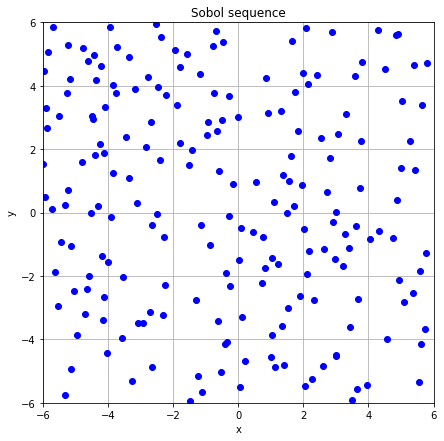

In [69]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
ax1.plot(res[:,0],res[:,1], 'ob')

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.grid(True)
plt.savefig('contour_sobol.png')
plt.title('Sobol sequence')
plt.draw()

plot diatas menunjukkan posisi dari titik awal menggunakan SOBOL sequence.<br>

bisa terlihat bahwa persebaran titik cukup merata dan tidak ada area yang kerapatannya sangat tinggi atau sangat rendah

### Plot mencari nilai optimasi (nilai minimum)

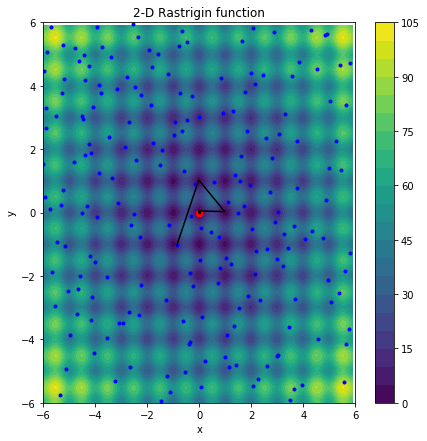

In [70]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)
ax1.plot(res[:,0],res[:,1], '.b')
ax1.plot(spi[:,0],spi[:,1], 'or')
ax1.plot(low[:,0],low[:,1], '-k')

i1 = np.arange(-6.0, 6.0, 0.1)
i2 = np.arange(-6.0, 6.0, 0.1)
x1m, x2m = np.meshgrid(i1, i2)
fm1 = fxr1(x1m, x2m)

plt.contourf(x1m, x2m, fm1,20)
plt.colorbar();

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.savefig('contour.png')
plt.title('2-D Rastrigin function')
plt.draw()

plot diatas menunjukkan contour dari fungsi 2-D Rastrigin dengan titik minimum terdapat pada (x,y) = (0,0) <br>

titik biru menunjukkan posisi nilai awal dengan sobol sequence<br>

titik merah adalah posisi titik minimum yang didapat menggunakan metode spiral dengan nilai sebesar 4.593284929632121e-05, 0.0002768534688786044 <br>

garis hitam menunjukkan perubahan titik terendah untuk setiap iterasi yang terjadi<br>

nilai akhir yang didapat untuk proses optimasi:

In [71]:
spi[len(spi)-1,0],spi[len(spi)-1,1]

(4.593284929632121e-05, 0.0002768534688786044)

### bentuk rotasi dari 1 titik hingga iterasi ke-k

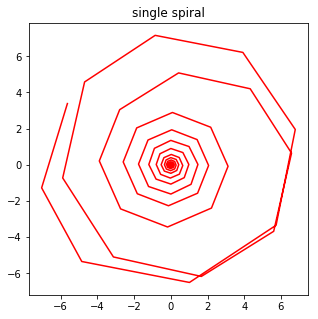

In [73]:
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)
ax1.plot(test[:,1,0],test[:,1,1],'r-')
plt.title('single spiral')
# Save the figure as a PNG
plt.savefig('iterations_point.png')

plot diatas menujukkan perubahan posisi untuk salah satu titik, <br>

bisa terlihat bahwa terjadi beberapa kali perubahan bentuk spiral hingga menuju konvergen pada satu titik saja

### Plot mencari akar-akar dari 2 fungsi

In [76]:
fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)

xx = np.arange(-6.0, 6.0, 0.1)
yy = np.arange(-6.0, 6.0, 0.1)
X, Y = np.meshgrid(xx,yy)
fm1 = fx1(X, Y)
fm2 = fx2(X, Y)

CS1 = plt.contour(X,Y,fm1,0,colors='b')
CS2 = plt.contour(X,Y,fm2,0,colors='r')

ax1.plot(res[:,0],res[:,1], 'ob')
ax1.plot(spi[:,0],spi[:,1], 'or')
ax1.plot(low[:,0],low[:,1], '-k')

fx3 = r'$f(x1,x2)=(x^{2}y^{2})-cos(x+y)$'
fx4 = r'$f(x1,x2)=(e^{x-y})-sin(x+y)$'

labels = [fx3,fx4]
CS1.collections[0].set_label(labels[0])
CS2.collections[0].set_label(labels[1])

plt.legend(loc='lower left', bbox_to_anchor=(0.6, -0.05))
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-6,6)
plt.ylim(-6,6)
plt.grid(True)
plt.savefig('root.png')
plt.show()

plot diatas menunjukkan plot 2 fungsi untuk mencari akar-akar yang ada  <br>

dengan metode spiral hanya didapat 1 titik saja, sehingga perlu metode tambahan untuk mencari akar-akar yang lain dengan lebih cepat (misal dikombinasikan dengan clustering)<br>

titik biru menunjukkan posisi nilai awal dengan sobol sequence<br>

titik merah adalah posisi titik minimum yang didapat menggunakan metode spiral dengan nilai sebesar 0.6673181744366163, 0.6902441371488096 <br>

garis hitam menunjukkan perubahan titik terendah untuk setiap iterasi yang terjadi<br>

nilai akhir yang didapat untuk proses optimasi:

In [77]:
spi[len(spi)-1,0],spi[len(spi)-1,1]

(0.6673181744366163, 0.6902441371488096)